# Progetto Filtro Spam email 

**Programmazione di Applicazioni Data Intensive**  
Università di Bologna, Campus di Cesena

Studente: Giacomo Casadei

Prima di iniziare, rimuovo i warning per una maggior chiarezza nei risultati.

In [1]:
import warnings
warnings.filterwarnings('ignore')

Importo alcune librerie utili nell'analisi dei dati.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Descrizione del problema e dataset

Lo scopo del problema è realizzare un ipotetico filtro anti-spam per le email che, leggendo il contenuto della mail ed estraendo alcune statistiche da essa, riesca a classificare correttamente una mail come spam oppure no.

Il dataset è stato preso da UCI Machine Learning Repositories (https://archive.ics.uci.edu/ml/index.php)

La documentazione relativa al dataset può essere consultata qui: https://archive.ics.uci.edu/ml/datasets/spambase oppure leggendo il file **spambase.DOCUMENTATION** scaricabile qui: https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

Purtroppo il file contenente i dati non include il nome delle colonne del dataset, dunque bisogna aggiungerle manualmente tramite una lista (nel repository, il file denominato spambase.names contiene i nomi delle colonne con le relative descrizioni, che riporterò più avanti)

In [3]:
col_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over",
"word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
"word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
"word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
"word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
"word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
"word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!",
"char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "is_spam"]

In [4]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

In [5]:
spam = pd.read_csv(URL, names=col_names, header=None)

**Descrizione delle features**

- 48 feature del tipo "word_freq_WORD": indica la percentuale di parole all'interno della mail che corrispondono alla parola WORD. Calcolata come 100 * (numero di occorrenze della parola WORD nella mail) / (parole totali nella mail) 
- 6 feature del tipo "char_freq_CHAR": indica la percentuale di caratteri all'interno della mail che corrispondono al carattere CHAR. Calcolata come 100 * (numero di occorrenze del carattere CHAR nella mail) / (caratteri totali nella mail)
- capital_run_lenght_average: lunghezza media di sequenze ininterrotte di caratteri maiuscoli
- capital_run_lenght_longest: lunghezza massima di una sequenza ininterrotta di caratteri maiuscoli
- capital_run_lenght_total: somma di tutti i caratteri maiuscoli presenti nella mail
- is_spam: variabile da predire, 1 in caso di classificazione come spam, 0 altrimenti

In [6]:
spam.head(10)

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   
5            0.00               0.00           0.00           0.0   
6            0.00               0.00           0.00           0.0   
7            0.00               0.00           0.00           0.0   
8            0.15               0.00           0.46           0.0   
9            0.06               0.12           0.77           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   
5           1.85            0.00              0.00                1.85   
6           1.92            0.00              0.00                0.00   
7           1.88            0.00              0.00                1.88   
8           0.61            0.00              0.30                0.00   
9           0.19            0.32              0.38                0.00   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1             0.00            0.94  ...         0.00        0.132   
2             0.64            0.25  ...         0.01        0.143   
3             0.31            0.63  ...         0.00        0.137   
4             0.31            0.63  ...         0.00        0.135   
5             0.00            0.00  ...         0.00        0.223   
6             0.00            0.64  ...         0.00        0.054   
7             0.00            0.00  ...         0.00        0.206   
8             0.92            0.76  ...         0.00        0.271   
9             0.06            0.00  ...         0.04        0.030   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   
5          0.0        0.000        0.000        0.000   
6          0.0        0.164        0.054        0.000   
7          0.0        0.000        0.000        0.000   
8          0.0        0.181        0.203        0.022   
9          0.0        0.244        0.081        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   
5                       3.000                          15   
6                       1.671                           4   
7                       2.450                          11   
8                       9.744                         445   
9                       1.729                          43   

   capital_run_length_total  is_spam  
0                       278        1  
1                      1028        1  
2                      2259        1  
3                       191        1  
4                       191        1  
5                        54        1  
6                       112        1  
7                        49        1  
8                

Visualizzo informazioni generali riguardo il dataFrame quali il numero di record, il numero di valori non nulli per ogni colonna e l'occupazione in memoria.

In [7]:
spam.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

Il dataFrame di compone di 4601 record e nessun valore risulta mancante.

# Analisi esplorativa

Procedo con l'utilizzo del metodo describe per visualizzare statistiche del dataFrame come la media, deviazione standard, percentili ecc. di ogni colonna. Ignoro la colonna "is_spam" perchè poco significativa in questo contesto.

Inoltre aumento il numero di colonne visibili nel frame.

In [8]:
pd.set_option('display.max_columns', 57)

In [9]:
spam.drop(columns='is_spam', inplace=False).describe()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.380000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  \
count      4601.000000     4601.000000        4601.000000     4601.000000   
mean          0.090067        0.239413           0.059824        0.541702   
std           0.278616        0.644755           0.201545        0.861698   
min           0.000000        0.000000           0.000000        0.000000   
25%           0.000000        0.000000           0.000000        0.000000   
50%           0.000000        0.000000           0.000000        0.100000   
75%           0.000000        0.160000           0.000000        0.800000   
max           5.260000       18.180000           2.610000        9.670000   

       word_freq_people  word_freq_report  word_freq_addresses  \
count       4601.000000       4601.000000          4601.000000   
mean           0.093930          0.058626             0.049205   
std            0.301036          0.335184             0.258843   
min            0.000000          0.000000             0.000000   
25%            0.000000          0.000000             0.000000   
50%            0.000000          0.000000             0.000000   
75%            0.000000          0.000000             0.000000   
max            5.550000         10.000000             4.410000   

       word_freq_free  word_freq_business  word_freq_email  word_freq_you  \
count     4601.000000         4601.000000      4601.000000    4601.000000   
mean         0.248848            0.142586         0.184745       1.662100   
std          0.825792            0.444055         0.531122       1.775481   
min          0.000000            0.000000         0.000000       0.000000   
25%          0.000000            0.000000         0.000000       0.000000   
50%          0.000000            0.000000         0.000000       1.310000   
75%          0.100000            0.000000         0.000000       2.640000   
max         20.000000            7.140000         9.090000      18.750000   

       word_freq_credit  word_freq_your  word_freq_font  word_freq_000  \
count       4601.000000     4601.000000     4601.000000    4601.000000   
mean           0.085577        0.809761        0.121202       0.101645   
std            0.509767        1.200810        1.025756       0.350286   
min            0.000000        0.000000        0.000000       0.000000   
25%            0.000000        0.000000        0.000000       0.000000   
50%            0.000000        0.220000        0.000000       0.000000   
75%            0.000000        1.270000        0.000000       0.000000   
max           18.180000       11.110000       17.100000       5.450000 

Possiamo ricavare alcune informazioni guardando queste statistiche. Quasi tutti i percentili sono 0 in quanto sono state considerate moltissime parole di uso comune ed è giustamente molto improbabile che in anche solo nel 25% delle mail compaia la parola table (ad esempio). Vale lo stesso discorso per le medie e anche per le colonne char_freq (tralasciando quei caratteri che spesso vengono inseriti ripetutamente nelle mail di spam come il ! o il $). 

Per quanto riguarda le ultime tre colonne sulle lettere maiuscole si notano dei dettagli un po' più particolari. Ad esempio si nota chiaramente che c'è un record relativo ad una mail (sicuramente classificata come spam) scritta quasi totalmente in maiuscolo, ma tranne questo caso isolato la distribuzione delle maiuscole sembra abbastanza normale negli altri casi (per esempio il primo quartile di capital_run_lenght_total è assolutamente comprensibile che in una mail di lavoro o anche personale ci siano in totale 35 lettere maiuscole considerato nomi propri e altro).

Cerco questo record scritto in maiuscolo.

In [10]:
spam[spam["capital_run_length_total"] > 15840]

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
1488            0.19                0.0           0.38           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
1488            0.0            0.19               0.0                 0.0   

      word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  \
1488              0.0             0.0               0.19            0.19   

      word_freq_people  word_freq_report  word_freq_addresses  word_freq_free  \
1488               0.0               0.0                  0.0            0.38   

      word_freq_business  word_freq_email  word_freq_you  word_freq_credit  \
1488                 0.0             0.19           1.14               0.0   

      word_freq_your  word_freq_font  word_freq_000  word_freq_money  \
1488            0.38             0.0            0.0              0.0   

      word_freq_hp  word_freq_hpl  word_freq_george  word_freq_650  ...  \
1488           0.0            0.0               0.0            0.0  ...   

      word_freq_telnet  word_freq_857  word_freq_data  word_freq_415  \
1488               0.0            0.0             0.0            0.0   

      word_freq_85  word_freq_technology  word_freq_1999  word_freq_parts  \
1488           0.0                   0.0             0.0              0.0   

      word_freq_pm  word_freq_direct  word_freq_cs  word_freq_meeting  \
1488           0.0               0.0           0.0                0.0   

      word_freq_original  word_freq_project  word_freq_re  word_freq_edu  \
1488                 0.0                0.0           0.0            0.0   

      word_freq_table  word_freq_conference  char_freq_;  char_freq_(  \
1488              0.0                   0.0         0.01         0.01   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
1488          0.0          0.0          0.0        0.003   

      capital_run_length_average  capital_run_length_longest  \
1488                       2.383                          21   

      capital_run_length_total  is_spam  
1488                     15841        1  

[1 rows x 58 columns]

A quanto pare questa mail non è scritta tutta in maiuscolo ma è scritta alternando caratteri maiuscoli e minuscoli. Molto fastidiosa e giustamente segnata come spam.

Ora cerco il record con capital_run_length_longest uguale a 9989 (palesemente un altro caso estremo)

In [11]:
spam[spam["capital_run_length_longest"] > 9988]

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
1753             0.0                0.0            0.0          0.04   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
1753            0.0             0.0               0.0                 0.0   

      word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  \
1753              0.0             0.0                0.0             0.0   

      word_freq_people  word_freq_report  word_freq_addresses  word_freq_free  \
1753               0.0               0.0                  0.0            0.02   

      word_freq_business  word_freq_email  word_freq_you  word_freq_credit  \
1753                 0.0              0.0           0.02               0.0   

      word_freq_your  word_freq_font  word_freq_000  word_freq_money  \
1753             0.0             0.0            0.0              0.0   

      word_freq_hp  word_freq_hpl  word_freq_george  word_freq_650  ...  \
1753           0.0            0.0               0.0            0.0  ...   

      word_freq_telnet  word_freq_857  word_freq_data  word_freq_415  \
1753               0.0            0.0             0.0            0.0   

      word_freq_85  word_freq_technology  word_freq_1999  word_freq_parts  \
1753           0.0                   0.0             0.0              0.0   

      word_freq_pm  word_freq_direct  word_freq_cs  word_freq_meeting  \
1753           0.0               0.0           0.0                0.0   

      word_freq_original  word_freq_project  word_freq_re  word_freq_edu  \
1753                 0.0                0.0           0.0            0.0   

      word_freq_table  word_freq_conference  char_freq_;  char_freq_(  \
1753              0.0                   0.0        1.024        9.752   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
1753        0.003        1.542        1.785        1.998   

      capital_run_length_average  capital_run_length_longest  \
1753                     239.571                        9989   

      capital_run_length_total  is_spam  
1753                     10062        1  

[1 rows x 58 columns]

Questa è chiaramente una mail scritta tutta in maiuscolo. Ora controllo il record con capital_run_length_average uguale a 1102.

In [12]:
spam[spam["capital_run_length_average"] > 1101]

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
372             0.2               0.81           0.61           0.0   

     word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
372            0.0             0.0               0.0                 0.0   

     word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  \
372              0.2             0.0                0.0             0.4   

     word_freq_people  word_freq_report  word_freq_addresses  word_freq_free  \
372               0.0               0.0                  0.0             0.2   

     word_freq_business  word_freq_email  word_freq_you  word_freq_credit  \
372                 0.0              0.0            0.2               0.0   

     word_freq_your  word_freq_font  word_freq_000  word_freq_money  \
372             0.2             0.0            0.0              0.4   

     word_freq_hp  word_freq_hpl  word_freq_george  word_freq_650  ...  \
372           0.0            0.0               0.0            0.0  ...   

     word_freq_telnet  word_freq_857  word_freq_data  word_freq_415  \
372               0.0            0.0             0.0            0.0   

     word_freq_85  word_freq_technology  word_freq_1999  word_freq_parts  \
372           0.0                   0.0             0.0              0.0   

     word_freq_pm  word_freq_direct  word_freq_cs  word_freq_meeting  \
372           0.0               0.0           0.0                0.0   

     word_freq_original  word_freq_project  word_freq_re  word_freq_edu  \
372                 0.0                0.0           0.0            0.0   

     word_freq_table  word_freq_conference  char_freq_;  char_freq_(  \
372              0.0                   0.0          0.0          0.0   

     char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
372          0.0        0.831        0.338         0.03   

     capital_run_length_average  capital_run_length_longest  \
372                      1102.5                        2204   

     capital_run_length_total  is_spam  
372                      2205        1  

[1 rows x 58 columns]

Anche questo record è relativo ad una mail scritta presumibilmente solo in maiuscolo. Chiaramente spam.

Per cercare di avere delle statistiche un po' più bilanciate, rimuovo tutti i record contenenti valori nelle ultime 3 colonne superiori al loro relativo terzo percentile moltiplicato per 10.

In [13]:
average_delete = spam[spam["capital_run_length_average"] > 37]
average_delete["is_spam"].value_counts()

1    45
0     2
Name: is_spam, dtype: int64

In [14]:
longest_delete = spam[spam["capital_run_length_longest"] > 430]
longest_delete["is_spam"].value_counts()

1    111
0      1
Name: is_spam, dtype: int64

In [15]:
total_delete = spam[spam["capital_run_length_total"] > 2660]
total_delete["is_spam"].value_counts()

1    42
0    13
Name: is_spam, dtype: int64

In [16]:
to_delete = total_delete.index
to_delete = to_delete.append(average_delete.index)
to_delete = to_delete.append(longest_delete.index)
to_delete

Int64Index([  48,   91,  359,  370,  407,  424,  513,  569,  581,  600,
            ...
            1619, 1753, 1763, 1769, 1772, 1783, 1784, 1791, 1806, 2014],
           dtype='int64', length=214)

Si osserva che la maggior parte di questi record estremi sono considerati (giustamente) come spam.

In [17]:
spam_adjusted = spam.drop(to_delete, inplace=False)

In [18]:
spam_adjusted.drop(columns='is_spam', inplace=False).describe()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4427.000000        4427.000000    4427.000000   4427.000000   
mean         0.098362           0.212349       0.269514      0.064872   
std          0.304191           1.314422       0.501942      1.414228   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.390000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4427.000000     4427.000000       4427.000000         4427.000000   
mean        0.307457        0.089248          0.109297            0.100136   
std         0.678491        0.268747          0.386154            0.402511   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.360000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  \
count      4427.000000     4427.000000        4427.000000     4427.000000   
mean          0.075525        0.223318           0.053668        0.534588   
std           0.263263        0.636946           0.194296        0.869114   
min           0.000000        0.000000           0.000000        0.000000   
25%           0.000000        0.000000           0.000000        0.000000   
50%           0.000000        0.000000           0.000000        0.000000   
75%           0.000000        0.080000           0.000000        0.790000   
max           5.260000       18.180000           2.610000        9.670000   

       word_freq_people  word_freq_report  word_freq_addresses  \
count       4427.000000       4427.000000          4427.000000   
mean           0.089469          0.048254             0.033065   
std            0.302205          0.321809             0.205475   
min            0.000000          0.000000             0.000000   
25%            0.000000          0.000000             0.000000   
50%            0.000000          0.000000             0.000000   
75%            0.000000          0.000000             0.000000   
max            5.550000         10.000000             4.410000   

       word_freq_free  word_freq_business  word_freq_email  word_freq_you  \
count     4427.000000         4427.000000      4427.000000    4427.000000   
mean         0.246675            0.133664         0.175132       1.659616   
std          0.826555            0.418022         0.525354       1.796261   
min          0.000000            0.000000         0.000000       0.000000   
25%          0.000000            0.000000         0.000000       0.000000   
50%          0.000000            0.000000         0.000000       1.290000   
75%          0.050000            0.000000         0.000000       2.645000   
max         20.000000            7.140000         9.090000      18.750000   

       word_freq_credit  word_freq_your  word_freq_font  word_freq_000  \
count       4427.000000     4427.000000     4427.000000    4427.000000   
mean           0.070041        0.784979        0.119614       0.088606   
std            0.474089        1.185440        1.019491       0.340131   
min            0.000000        0.000000        0.000000       0.000000   
25%            0.000000        0.000000        0.000000       0.000000   
50%            0.000000        0.140000        0.000000       0.000000   
75%            0.000000        1.240000        0.000000       0.000000   
max           18.180000       11.110000       17.100000       5.450000 

Ora è decisamente più bilanciato dal punto di vista dei valori.

Proseguo con l'analisi delle correlazioni tra le variabili.

Introduco una funzione che calcola la correlazione di Pearson tra due feature.

In [19]:
def correlation(x, y):
    return np.mean((x - x.mean()) * (y - y.mean())) / (x.std() * y.std())

E una funzione per calcolare la correlazione tra tutte le coppie di feature presenti nel dataset.

In [20]:
def correlation_values(df):
    corr_values = {}
    for i, name in enumerate(df):
        for i2, name2 in enumerate(df):
            if i2 > i:
                x = df[name].values
                y = df[name2].values
                corr_values[(name, name2)] = correlation(x, y)
    return corr_values

In [21]:
correlations = correlation_values(spam_adjusted)

Creato questo dizionario lo converto a dataFrame

In [22]:
correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['value'])

In [23]:
correlations_df

value
(word_freq_make, word_freq_address)                -0.020014
(word_freq_make, word_freq_all)                     0.051299
(word_freq_make, word_freq_3d)                      0.015152
(word_freq_make, word_freq_our)                     0.023586
(word_freq_make, word_freq_over)                    0.055738
...                                                      ...
(capital_run_length_average, capital_run_length...  0.346278
(capital_run_length_average, is_spam)               0.350293
(capital_run_length_longest, capital_run_length...  0.581214
(capital_run_length_longest, is_spam)               0.376452
(capital_run_length_total, is_spam)                 0.260746

[1653 rows x 1 columns]

Essendoci veramente tanti valori, considero solo quelli fortemente correlati (per esempio con un valore superiore a 0.65 sia in positivo che in negativo)

In [24]:
correlations_df.loc[(correlations_df['value'] >= 0.65) | (correlations_df['value'] <= -0.65)]

value
(word_freq_labs, word_freq_857)                     0.660064
(word_freq_labs, word_freq_415)                     0.657856
(word_freq_telnet, word_freq_857)                   0.737322
(word_freq_telnet, word_freq_415)                   0.735080
(word_freq_telnet, word_freq_technology)            0.677480
(word_freq_telnet, word_freq_direct)                0.700676
(word_freq_857, word_freq_415)                      0.996216
(word_freq_857, word_freq_technology)               0.729594
(word_freq_857, word_freq_direct)                   0.849076
(word_freq_415, word_freq_technology)               0.727111
(word_freq_415, word_freq_direct)                   0.846563
(word_freq_technology, word_freq_direct)            0.674864
(capital_run_length_average, capital_run_length...  0.681952

Si può osservare come le correlazioni più alte sono tra parole relative ad un contesto presumibilmente lavorativo quali 857, 415, technology e direct. Mentre è presente una correlazione non trascurabile tra la media della lunghezze di parole in maiuscolo e la parola scritta in miuscolo più lunga. Inoltre, tra le correlazioni con valore assoluto più alto, non ce n'è nessuna negativa.

Costruisco una color map e visualizzo degli scatter plot di alcune correlazioni.

In [25]:
spam_color_map = {0: "blue", 1: "orange"}

In [26]:
spam_colors = spam_adjusted["is_spam"].map(spam_color_map)

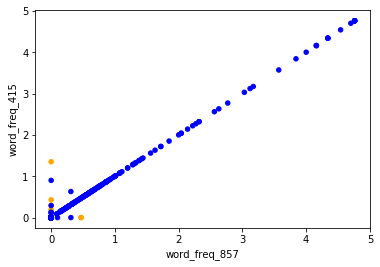

In [27]:
spam_adjusted.plot.scatter('word_freq_857', 'word_freq_415', c=spam_colors)

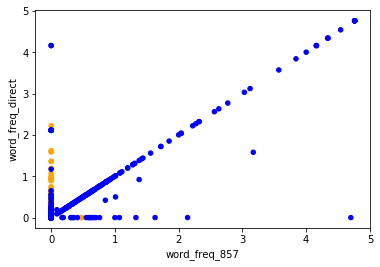

In [28]:
spam_adjusted.plot.scatter('word_freq_857', 'word_freq_direct', c=spam_colors)

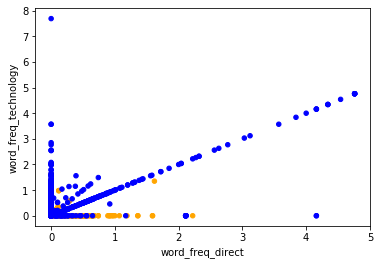

In [29]:
spam_adjusted.plot.scatter('word_freq_direct', 'word_freq_technology', c=spam_colors)

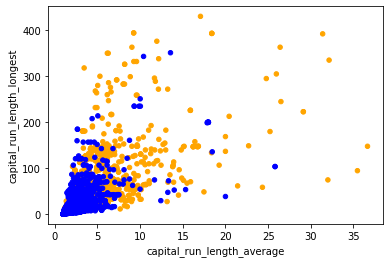

In [30]:
spam_adjusted.plot.scatter('capital_run_length_average', 'capital_run_length_longest', c=spam_colors)

Si osserva che le correlazioni tra i termini di ambito lavorativo sono pressocchè quasi totalmente lineari e che pochissime di quelle mail sono state classificate come spam. Mentre si evince dall'ultimo grafico che all'aumentare della lunghezza delle sequenze in maiuscolo o all'aumentare della loro media, il filtro le classifica sempre più facilmente come spam.

Infine mostro la distribuzione della feature capital_run_length_total evidenziando in quali intervalli viene evidenziata di più come spam. 

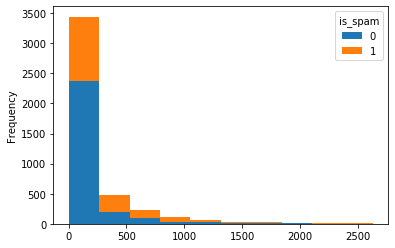

In [31]:
spam_adjusted.pivot(columns="is_spam")["capital_run_length_total"].plot.hist(bins=10, stacked=True);

Come era prevedibile, meno lettere maiuscole ci sono nella mail, meno è probabile che la mail venga considerata spam.

# Standardizzazione e preparazione dati

Analizzo ora la distribuzione delle classi.

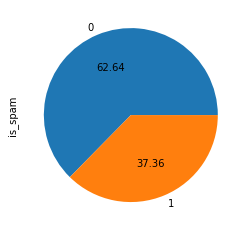

In [32]:
spam_adjusted["is_spam"].value_counts().plot.pie(autopct='%.2f');

Essendo una distribuzione molto prossima al 60:40, posso dunque considerare questo problema bilanciato dal punto di vista delle istanze delle classi e mi concedo di non ricorrere a tecniche per la gestione delle classi sbilanciate quali l'under/oversampling.

Ora creo il training e il validation set.

In [33]:
spam_X = spam_adjusted.drop(columns="is_spam", inplace=False)

In [34]:
spam_y = spam_adjusted["is_spam"]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = \
    train_test_split(spam_X, spam_y, test_size=1/3, random_state=22)

Proseguo con il considerare un semplice modello di regressione logistica per verificare la situazione di partenza.

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10, solver="saga", random_state=22)

In [37]:
%time model.fit(X_train, y_train)

Wall time: 332 ms


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=22, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
model.score(X_val, y_val)

0.755420054200542

R2 score più che accettabile, considerato che è il primissimo passo verso un modello ottimizzato il più possibile. Analizzo ora la confusion matrix.

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

0    1
0  624  311
1   50  491

Nonostante siano presenti più istanze della classe 0 (non-spam), il modello non si concentra su di esse e ottiene ottimi punteggi nel classificare le mail come spam. Tuttavia l'obiettivo sarebbe il contrario, ossia privilegiare il riconoscimento corretto di una mail non-spam, in quanto sapiiamo benissimo il disagio che può causare una mail lavorativa finita nella cartella dello spam.

Analizzo la recall, precision e f1 del modello in questione.

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [42]:
precision_score(y_val, y_pred, average=None)

array([0.92581602, 0.61221945])

In [43]:
recall_score(y_val, y_pred, average=None)

array([0.66737968, 0.90757856])

In [44]:
f1_score(y_val, y_pred, average=None)

array([0.77563704, 0.73119881])

Nonostante la precision e la recall praticamente invertite per le due classi (comunque abbastanza buona), f1 score è molto incoraggiante per essere solo all'inizio (indica anche che il problema non ha classi eccessivamente sbilanciate). Come espresso prima, è necessario aumentare il recall della classe 0.

Provo con la normalizzazione dei dati tramite la funzione fornita da scikit learn.

In [45]:
from sklearn.preprocessing import normalize
X_train_norm = normalize(X_train)
X_val_norm = normalize(X_val)

In [46]:
model_norm = LogisticRegression(C=10, solver='saga', random_state=22)
%time model_norm.fit(X_train_norm, y_train)

Wall time: 182 ms


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=22, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
model_norm.score(X_val_norm, y_val)

0.8021680216802168

Si nota già un netto miglioramento nello score (e a differenza di prima, ora il modello converge con il numero di iterazioni di default). Osserviamo la confusion matrix e le varie metriche.

In [48]:
y_pred_norm = model_norm.predict(X_val_norm)
cmn = confusion_matrix(y_val, y_pred_norm)
pd.DataFrame(cmn, index=model.classes_, columns=model.classes_)

0    1
0  827  108
1  184  357

In [49]:
precision_score(y_val, y_pred_norm, average=None)

array([0.81800198, 0.76774194])

In [50]:
recall_score(y_val, y_pred_norm, average=None)

array([0.88449198, 0.65988909])

In [51]:
f1_score(y_val, y_pred_norm, average=None)

array([0.84994861, 0.70974155])

A fronte di una riduzione del precision score della classe non-spam e una _grossa_ riduzione del recall score della classe spam, si registra un incremento del precision score della classe spam, un notevole aumento del recall score e del f1-score della classe non-spam. Nonostante molte mail effettivamente spam non vengano registrate come tali, il numero di mail non-spam classificate erroneamente è diminuito parecchio, ossia il risultato auspicato. 

Provo ad applicare la standardizzazione e, in caso di miglioramento rispetto al modello base, proverò in seguito una combinazione di standardizzazione e normalizzazione.

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
model_std = Pipeline([
    ("scale", StandardScaler()),
    ("logregr", LogisticRegression(C=10, solver="saga", random_state=22))
])
%time model_std.fit(X_train, y_train)

Wall time: 370 ms


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logregr',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=22,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [53]:
model_std.score(X_val, y_val)

0.9193766937669376

Il miglioramento è evidente. Analizzo ora confusion matrix e metriche.

In [54]:
y_pred_std = model_std.predict(X_val)
cms = confusion_matrix(y_val, y_pred_std)
pd.DataFrame(cms, index=model.classes_, columns=model.classes_)

0    1
0  892   43
1   76  465

In [55]:
precision_score(y_val, y_pred_std, average=None)

array([0.9214876 , 0.91535433])

In [56]:
recall_score(y_val, y_pred_std, average=None)

array([0.9540107 , 0.85951941])

In [57]:
f1_score(y_val, y_pred_std, average=None)

array([0.93746716, 0.88655863])

Si registrano grandi miglioramenti in ogni statistica, prima di analizzare l'eventuale presenza di feature trascurabili provo una combinazione di normalizzazione e standardizzazione.

In [58]:
model_stdn = Pipeline([
    ("scale", StandardScaler()),
    ("logregr", LogisticRegression(C=10, solver="saga", random_state=22))
])
%time model_stdn.fit(X_train_norm, y_train)

Wall time: 349 ms


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logregr',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=22,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [59]:
model_stdn.score(X_val_norm, y_val)

0.8719512195121951

In [60]:
y_pred_stdn = model_stdn.predict(X_val_norm)
cmsn = confusion_matrix(y_val, y_pred_stdn)
pd.DataFrame(cmsn, index=model.classes_, columns=model.classes_)

0    1
0  831  104
1   85  456

Il risultato è leggermente inferiore alla versione con solo l'utilizzo della standardizzazione. Dunque d'ora in poi utilizzerò solo la standardizzazione.

Ora controllo la presenza di feature trascurabili.

In [61]:
model_l1 = Pipeline([
    ("scale", StandardScaler()),
    ("logregr", LogisticRegression(C=0.1, solver="saga", penalty='l1', random_state=22))
])
%time model_l1.fit(X_train, y_train)
pd.Series(model_l1.named_steps["logregr"].coef_[0], index = X_train.columns)

Wall time: 433 ms


word_freq_make               -0.105062
word_freq_address            -0.065148
word_freq_all                 0.045558
word_freq_3d                  0.097986
word_freq_our                 0.359479
word_freq_over                0.237716
word_freq_remove              0.911888
word_freq_internet            0.234064
word_freq_order               0.246428
word_freq_mail                0.091666
word_freq_receive            -0.061955
word_freq_will               -0.084304
word_freq_people              0.000000
word_freq_report              0.000000
word_freq_addresses           0.098170
word_freq_free                0.448567
word_freq_business            0.332953
word_freq_email               0.188912
word_freq_you                 0.123581
word_freq_credit              0.231895
word_freq_your                0.271609
word_freq_font                0.134078
word_freq_000                 0.631857
word_freq_money               0.255319
word_freq_hp                 -1.568590
word_freq_hpl            

In [62]:
model_l1.named_steps["logregr"].classes_

array([0, 1], dtype=int64)

L'ordine dei coefficienti indica che un valore positivo contribuisce per la classficazione come spam.

In [63]:
model_l1.score(X_val, y_val)

0.9173441734417345

Osservando i coefficienti con peso nullo si nota che sono stati annullati molti coefficienti generalmente associati a feature che contribuiscono all'identificazione di una mail non spam. L R2 score è rimasto pressocchè invariato, analizziamo la confusion matrix e le metriche prima di scegliere se rimuovere effettivamente tali feature.

In [64]:
y_pred_l1 = model_stdn.predict(X_val)
cml1 = confusion_matrix(y_val, y_pred_l1)
pd.DataFrame(cml1, index=model.classes_, columns=model.classes_)

0    1
0  282  653
1    4  537

In [65]:
precision_score(y_val, y_pred_l1, average=None)

array([0.98601399, 0.4512605 ])

In [66]:
recall_score(y_val, y_pred_l1, average=None)

array([0.30160428, 0.99260628])

In [67]:
f1_score(y_val, y_pred_l1, average=None)

array([0.46191646, 0.62045061])

Come si poteva intuire, ora il modello classfica quasi tutto come spam. Il risultato è inaccettabile e dunque sono necessarie tutte le feature.

# Ricerca iperparametri migliori

Inizio col definire alcune funzioni di appoggio per questa fase.

In [68]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV
import math

kf = KFold(5, shuffle=True, random_state=22)

In [69]:
def grid_test(model, grid):
    gs = GridSearchCV(model, grid, cv=kf);
    gs.fit(X_train, y_train);
    print("Combinazione migliore di parametri: {}".format(gs.best_params_))
    print("R2 coeff: {}".format(gs.score(X_val, y_val)))
    #svm_imp = pd.Series(gs.best_estimator_[1].support_vectors_[0], index=X_train.columns)
    #svm_imp.nlargest(4).plot(kind='barh')

In [70]:
def show_confusion_matrix(model):
    model.fit(X_train,y_train)
    cm = confusion_matrix(y_val, model.predict(X_val))
    return pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

Ora proseguo con il ricercare la combinazione migliori di iperparametri dei seguenti modelli:
- Perceptron
- Logistic Regression
- MultiLayer Perceptron
- Support Vector Machine

Per ogni modello saranno mostrati il punteggio R2 derivato dalla grid search e la confusion matrix relativa ad un modello addestrato con la combinazione di parametri individuata dalla grid search.

**Perceptron**

In [71]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures

In [72]:
perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True))
])

grid = {'perceptron__penalty': [None, 'l1', 'l2', 'elasticnet'],
    'perceptron__alpha': [0.0001, 0.001, 0.01, 1]}
%time grid_test(perceptron, grid)

Combinazione migliore di parametri: {'perceptron__alpha': 0.0001, 'perceptron__penalty': None}
R2 coeff: 0.9037940379403794
Wall time: 2.88 s


In [73]:
Perceptron_test = Pipeline([
    ("scaler", StandardScaler()),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True))
])
show_confusion_matrix(Perceptron_test)

0    1
0  883   52
1   90  451

**Logistic Regression**

In [74]:
Logistic_Regression = Pipeline([
    ("scaler", StandardScaler()),
    ("logregr",   LogisticRegression(solver="saga", random_state=22))
])
grid = [
    {
        "logregr__penalty": ["l2", "l1"],
        "logregr__C": np.logspace(-2, 2, 5)
    },
    {
        "logregr__penalty": ["elasticnet"],
        "logregr__C": np.logspace(-2, 2, 5),
        "logregr__l1_ratio": [0.25, 0.5, 0.75]
    }]
%time grid_test(Logistic_Regression, grid)

Combinazione migliore di parametri: {'logregr__C': 10.0, 'logregr__penalty': 'l2'}
R2 coeff: 0.9193766937669376
Wall time: 41 s


In [75]:
Logistic_Regression_test = Pipeline([
    ("scaler", StandardScaler()),
    ("logregr",   LogisticRegression(C=10, penalty='l2', solver="saga", random_state=22))
])
show_confusion_matrix(Logistic_Regression_test)

0    1
0  892   43
1   76  465

**Perceptron con Polynomial Features**

In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True))
])

grid = {
    'perceptron__penalty': ['l1', 'l2'],
    'perceptron__alpha': [0.0001, 0.001, 0.01]
}

%time grid_test(poly_perceptron, grid)

Combinazione migliore di parametri: {'perceptron__alpha': 0.0001, 'perceptron__penalty': 'l1'}
R2 coeff: 0.9058265582655827
Wall time: 11.9 s


In [77]:
Perceptron_poly_test = Pipeline([
    ("scaler", StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, penalty='l1'))
])
show_confusion_matrix(Perceptron_poly_test)

0    1
0  873   62
1   77  464

**MultiLayer Perceptron**

In [78]:
from sklearn.neural_network import MLPClassifier

In [79]:
MLPC = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(activation="relu", random_state=22))
])
grid = {
    "mlp__hidden_layer_sizes": [16, 32, (16, 8), (32, 16)],
    "mlp__batch_size": [100, 200]
}
%time grid_test(MLPC, grid)

Combinazione migliore di parametri: {'mlp__batch_size': 100, 'mlp__hidden_layer_sizes': 16}
R2 coeff: 0.943089430894309
Wall time: 1min 46s


In [80]:
MLPC_test = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(activation="relu", batch_size=100, hidden_layer_sizes=16, random_state=22))
])
show_confusion_matrix(MLPC_test)

0    1
0  902   33
1   51  490

**Support Vector Machine**

In [81]:
from sklearn.svm import SVC

In [82]:
SVM = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(gamma="scale", kernel="rbf", random_state=22))
])

grid = [
  {
      "svc__C": [0.5, 1, 2, 3, 5, 10],
  }
]
%time grid_test(SVM, grid)

Combinazione migliore di parametri: {'svc__C': 2}
R2 coeff: 0.9281842818428184
Wall time: 10 s


In [83]:
SVC_test = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(gamma="scale", kernel="rbf", random_state=22, C=2))
])
show_confusion_matrix(SVC_test)

0    1
0  900   35
1   71  470

# Valutazione modelli

Dopo aver individuato i modelli e relativi iperparametri migliori, proseguo con analizzare più approfonditamente i modelli ottenuti tramite grid search.

Per ogni modello (userò i modelli \_test ricavati ed addestrati in precedenza) verranno estratte tutte le metriche ottenute dalla funzione classification_report, il MSE e l'intervallo di confidenza con quest'ultima fissata al 95% ottenuta con il metodo di Wilson.

In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [85]:
from statsmodels.stats.proportion import proportion_confint
confidence = 95

def print_confidence_interval(instance, acc):    
    lower, upper = proportion_confint(instance * acc, instance, 1-confidence/100, method='wilson')
    print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

In [86]:
def print_mse(model):
    print('MSE: {}'.format(mean_squared_error(y_val, model.predict(X_val))))

**Perceptron**

In [87]:
print(classification_report(y_val, Perceptron_test.predict(X_val), target_names=['non-spam', 'spam']))

              precision    recall  f1-score   support

    non-spam       0.91      0.94      0.93       935
        spam       0.90      0.83      0.86       541

    accuracy                           0.90      1476
   macro avg       0.90      0.89      0.89      1476
weighted avg       0.90      0.90      0.90      1476



In [88]:
print_confidence_interval(len(X_train), Perceptron_test.score(X_val, y_val))

Interval with confidence 95%: 
Pmin = 89.2624%
Pmax = 91.3914%


In [89]:
print_mse(Perceptron_test)

MSE: 0.09620596205962059


**Logistic Regression**

In [90]:
print(classification_report(y_val, Logistic_Regression_test.predict(X_val), target_names=['non-spam', 'spam']))

              precision    recall  f1-score   support

    non-spam       0.92      0.95      0.94       935
        spam       0.92      0.86      0.89       541

    accuracy                           0.92      1476
   macro avg       0.92      0.91      0.91      1476
weighted avg       0.92      0.92      0.92      1476



In [91]:
print_confidence_interval(len(X_train), Logistic_Regression_test.score(X_val, y_val))

Interval with confidence 95%: 
Pmin = 90.9000%
Pmax = 92.8663%


In [92]:
print_mse(Logistic_Regression_test)

MSE: 0.08062330623306233


**Perceptron con Polynomial Features**

In [93]:
print(classification_report(y_val, Perceptron_poly_test.predict(X_val), target_names=['non-spam', 'spam']))

              precision    recall  f1-score   support

    non-spam       0.92      0.93      0.93       935
        spam       0.88      0.86      0.87       541

    accuracy                           0.91      1476
   macro avg       0.90      0.90      0.90      1476
weighted avg       0.91      0.91      0.91      1476



In [94]:
print_confidence_interval(len(X_train), Perceptron_poly_test.score(X_val, y_val))

Interval with confidence 95%: 
Pmin = 89.4755%
Pmax = 91.5843%


In [95]:
print_mse(Perceptron_poly_test)

MSE: 0.09417344173441734


**Multi Layer Perceptron**

In [96]:
print(classification_report(y_val, MLPC_test.predict(X_val), target_names=['non-spam', 'spam']))

              precision    recall  f1-score   support

    non-spam       0.95      0.96      0.96       935
        spam       0.94      0.91      0.92       541

    accuracy                           0.94      1476
   macro avg       0.94      0.94      0.94      1476
weighted avg       0.94      0.94      0.94      1476



In [97]:
print_confidence_interval(len(X_train), MLPC_test.score(X_val, y_val))

Interval with confidence 95%: 
Pmin = 93.4140%
Pmax = 95.0886%


In [98]:
print_mse(MLPC_test)

MSE: 0.056910569105691054


**Support Vector Machine**

In [99]:
print(classification_report(y_val, SVC_test.predict(X_val), target_names=['non-spam', 'spam']))

              precision    recall  f1-score   support

    non-spam       0.93      0.96      0.94       935
        spam       0.93      0.87      0.90       541

    accuracy                           0.93      1476
   macro avg       0.93      0.92      0.92      1476
weighted avg       0.93      0.93      0.93      1476



In [100]:
print_confidence_interval(len(X_train), SVC_test.score(X_val, y_val))

Interval with confidence 95%: 
Pmin = 91.8302%
Pmax = 93.6953%


In [101]:
print_mse(SVC_test)

MSE: 0.07181571815718157


# Analisi modello migliore e conclusioni

Nonostante il modello MultiLayer Perceptron abbia conseguito dei punteggi superiori agli altri, intendo scegliere come modello finale il Support Vector Machine perchè il primo è un modello basato su reti neurali e anche perchè entrambi hanno conseguito lo stesso recall score sulla classe non spam (punteggio particolarmente focale nel problema in questione).

Analizziamo innanzitutto quanto questo modello sia migliore di un modello casuale.

In [102]:
from sklearn.dummy import DummyClassifier

random = DummyClassifier()
random.fit(X_train, y_train)
random.score(X_val, y_val)

0.5630081300813008

In [103]:
show_confusion_matrix(random)

0    1
0  603  332
1  333  208

In [104]:
print(classification_report(y_val, random.predict(X_val), target_names=['non-spam', 'spam']))

              precision    recall  f1-score   support

    non-spam       0.63      0.60      0.62       935
        spam       0.36      0.38      0.37       541

    accuracy                           0.52      1476
   macro avg       0.49      0.49      0.49      1476
weighted avg       0.53      0.52      0.52      1476



Ovviamente la differenza è notevole e questo modello casuale non è neanche lontanamente paragonabile ad uno qualsiasi dei modelli ricavati dalle grid search.

Controlliamo se i valori positivi delle feature indicano una propensione della mail ad essere considerata spam o no.

In [105]:
SVC_test.named_steps['svc'].classes_

array([0, 1], dtype=int64)

Valori positivi indicano che la mail è più probabile che venga considerata spam.

Ora analizziamo quali sono le 3 feature più rilevanti nel riconoscimento di una mail spam.

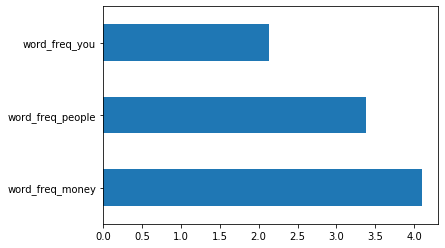

In [106]:
pd.Series(SVC_test.named_steps['svc'].support_vectors_[0], index=X_train.columns).nlargest(3).plot(kind='barh')

La feature più influente è la frequenza della parola Money, il che non sorprende siccome molte mail spam richiedono un pagamento o l'immissione di credenziali false per "guadagnare soldi facili".

Osserviamo ora le 3 feature più inclini a classificare una mail come non spam.

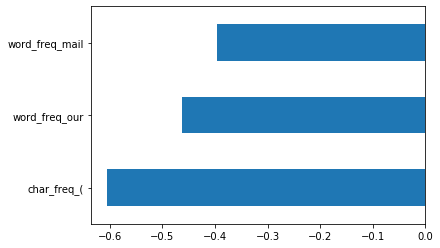

In [107]:
pd.Series(SVC_test.named_steps['svc'].support_vectors_[0], index=X_train.columns).nsmallest(3).plot(kind='barh')

La feature più rilevante non classificare una mail come non spam è la frequenza del carattere (, che insieme a parole come mail e our indicano più probabilmente un registro di linguaggio tipico delle mail lavorative.

In [108]:
conda install nbconvert

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
